<a href="https://colab.research.google.com/github/klysman08/Keggle/blob/master/Previs%C3%A3o_de_invent%C3%A1rio_MLPClassifier_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
0# Módulos utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Leitura dos arquivos, preenchendo valores faltantes com -1
train = pd.read_csv('drive/My Drive/Machine Learning/Previsão de inventário/train.csv', index_col='sku').fillna(-1)
test = pd.read_csv('drive/My Drive/Machine Learning/Previsão de inventário/test.csv', index_col='sku').fillna(-1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Separação de atributos de entrada (X) e saída (y)
X_train, y_train = train.drop('isBackorder', axis=1), train['isBackorder']

In [5]:
X_train.values

array([[  5.,   2.,   0., ...,   0.,   1.,   0.],
       [ 17.,   8.,   0., ...,   0.,   1.,   0.],
       [ 11.,  10.,   0., ...,   0.,   1.,   0.],
       ...,
       [ 26.,  -1.,   0., ...,   1.,   0.,   0.],
       [  5.,  -1.,   0., ...,   0.,   1.,   0.],
       [148.,   9.,   0., ...,   0.,   1.,   0.]])

In [6]:

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train.values)  


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[0.58545493 0.38604383 0.02250401 0.00363459]
[34483924.52917003 28001948.96878019  6760828.40568139  2717051.33014926]


In [0]:
X_train_pca = pd.DataFrame(pca.transform(X_train))

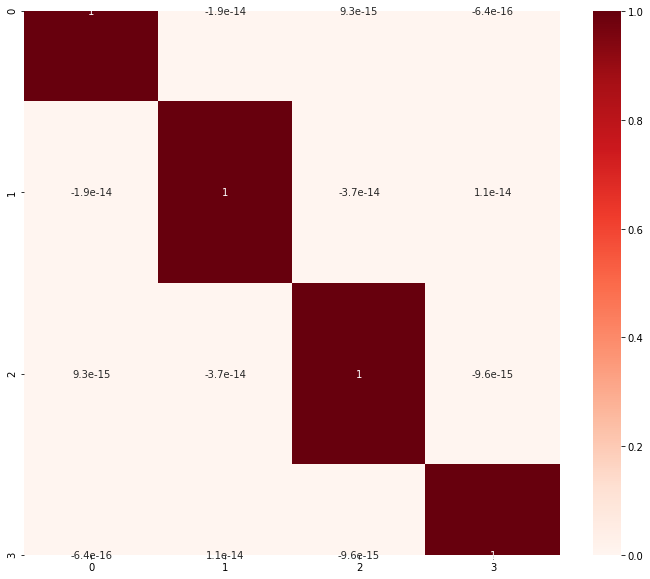

In [8]:
plt.figure(figsize=(12,10))
cor = X_train_pca.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
X_train_pca.columns

RangeIndex(start=0, stop=4, step=1)

In [10]:
# Ajuste do modelo
from sklearn.ensemble import RandomForestClassifier
model = MLPClassifier(hidden_layer_sizes=(30,20,20,10,10), activation='relu',alpha=0.0001, learning_rate='adaptive', solver='adam', random_state=42, max_iter=200, shuffle=True, verbose=True,)
model.fit(X_train_pca, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 0.04058394
Iteration 3, loss = 0.04110633
Iteration 4, loss = 0.04025835
Iteration 5, loss = 0.03875650
Iteration 6, loss = 0.03807793
Iteration 7, loss = 0.03810623
Iteration 8, loss = 0.03841258
Iteration 9, loss = 0.03702742
Iteration 10, loss = 0.03623276
Iteration 11, loss = 0.03632325
Iteration 12, loss = 0.03608577
Iteration 13, loss = 0.03635319
Iteration 14, loss = 0.03583441
Iteration 15, loss = 0.03585534
Iteration 16, loss = inf
Iteration 17, loss = 0.03556871
Iteration 18, loss = inf
Iteration 19, loss = 0.03550077
Iteration 20, loss = inf
Iteration 21, loss = 0.03522832
Iteration 22, loss = 0.03514549
Iteration 23, loss = 0.03481733
Iteration 24, loss = inf
Iteration 25, loss = 0.03461773
Iteration 26, loss = 0.03455696
Iteration 27, loss = inf
Iteration 28, loss = 0.03435663
Iteration 29, loss = 0.03433188
Iteration 30, loss = 0.03449127
Iteration 31, loss = inf
Iteration 32, loss = 0.03434593
Iteration 33, loss = inf
Iteration

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20, 20, 10, 10), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
test_pca = pd.DataFrame(pca.transform(test))

In [0]:
# Predição da probabilidade de falta (y) para novos valores
y_pred = model.predict_proba(test_pca)[:,1]

In [0]:
# Cria e salva arquivo para submissão
test['isBackorder'] = y_pred
pred = test['isBackorder'].reset_index()
pred.to_csv('submissionPCAv1.3.csv',index=False)